# Ejercicio - Regularización

Para este ejercicio vamos a usar el dataset de películas que usamos en el ejercicio de regresión lineal.

Cargamos los datos, y seleccionamos las columnas numéricas (eliminando los NaN)

In [1]:
import pandas as pd
import numpy as np

pelis_numerico = pd.read_csv("data/movies.csv").select_dtypes(np.number).fillna(0)

variable_objetivo = "ventas"

pelis_numerico.head()

presupuesto  popularidad      ventas  duracion  puntuacion  n_votos
0          0.0     8.387519  76578911.0     106.0         5.7    173.0
1          0.0     0.894647    676525.0     106.0         6.7     13.0
2    3500000.0    14.569650  28215918.0      91.0         7.0    513.0
3          0.0     8.963037        32.0      87.0         6.0    124.0
4   12000000.0     9.592265  41205099.0      92.0         6.5    767.0

### Crear modelo de regresión Lineal, de Regularizacion L1, L2 y Elasticnet. Calcular su RMSE (raiz del error cuadrático medio) medio con validación cruzada (5 particiones)

**THIS IS WHAT I KNOW NOW**

In [14]:
from sklearn.linear_model import LinearRegression

In [3]:
model = LinearRegression()

In [4]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [7]:
model.fit(X=pelis_numerico[["presupuesto", "popularidad", "duracion", "puntuacion", "n_votos"]], y=pelis_numerico["ventas"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
pelis_numerico["ventas_pred"] = model.predict(pelis_numerico[["presupuesto", "popularidad", "duracion", "puntuacion", "n_votos"]])

In [13]:
pelis_numerico[["ventas", "ventas_pred"]].head()

ventas   ventas_pred
0  76578911.0  1.350624e+07
1    676525.0  5.503581e+06
2  28215918.0  3.876680e+07
3        32.0  9.331852e+06
4  41205099.0  6.737609e+07

**THIS IS NEW**

In [40]:
from sklearn.linear_model import (LinearRegression, Lasso,
                                  Ridge, ElasticNet)

In [18]:
model_ols = LinearRegression()
model_ols.fit(X=pelis_numerico[["presupuesto", "popularidad", "duracion", "puntuacion", "n_votos"]], y=pelis_numerico["ventas"])
model_ols.coef_

array([ 1.22671818e+00, -2.86498152e+05,  4.72544841e+04,  5.48802981e+05,
        6.68634838e+04])

In [20]:
def norma_l1(coeficientes):
    return np.linalg.norm(coeficientes, ord=1)

def norma_l2(coeficientes):
    return np.linalg.norm(coeficientes, ord=2)

print(norma_l1(model_ols.coef_))
print(norma_l2(model_ols.coef_))

949420.3284352288
624475.4722435182


In [21]:
def norma_l1_cv(estimator, X, y):
    return norma_l1(estimator.coef_)

def norma_l2_cv(estimator, X, y):
    return norma_l2(estimator.coef_)

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
transformador_polinomial = PolynomialFeatures(5)

In [25]:
transformador_polinomial.fit(pelis_numerico)

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [28]:
variables_polinomiales = transformador_polinomial.transform(
    pelis_numerico)
variables_polinomiales.shape

(1349, 792)

In [30]:
pelis_numerico.loc[0]

presupuesto    0.000000e+00
popularidad    8.387519e+00
ventas         7.657891e+07
duracion       1.060000e+02
puntuacion     5.700000e+00
n_votos        1.730000e+02
ventas_pred    1.350624e+07
Name: 0, dtype: float64

In [31]:
variables_polinomiales[0]

array([1.00000000e+00, 0.00000000e+00, 8.38751900e+00, 7.65789110e+07,
       1.06000000e+02, 5.70000000e+00, 1.73000000e+02, 1.35062419e+07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.03504750e+01,
       6.42307071e+08, 8.89077014e+02, 4.78088583e+01, 1.45104079e+03,
       1.13283860e+08, 5.86432961e+15, 8.11736457e+09, 4.36499793e+08,
       1.32481516e+10, 1.03429329e+15, 1.12360000e+04, 6.04200000e+02,
       1.83380000e+04, 1.43166164e+09, 3.24900000e+01, 9.86100000e+02,
       7.69855786e+07, 2.99290000e+04, 2.33657984e+09, 1.82418569e+14,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [32]:
variables_polinomiales = PolynomialFeatures(5).fit_transform(
    pelis_numerico)

In [33]:
variables_polinomiales.shape

(1349, 792)

**OLS MODEL**

In [44]:
RESULTADOS = {}
model_ols = LinearRegression()
model_ols.fit(X=pelis_numerico[["presupuesto", "popularidad", "duracion", "puntuacion", "n_votos"]], y=pelis_numerico["ventas"])
print(model_ols.coef_)

RESULTADOS["ols"] = {
    "norma_l1": norma_l1(model_ols.coef_),
    "norma_l2": norma_l2(model_ols.coef_),
}

[ 1.22671818e+00 -2.86498152e+05  4.72544841e+04  5.48802981e+05
  6.68634838e+04]


**L1 MODEL**

In [46]:
model_l1 = Lasso(alpha=1.0, tol=0.01, max_iter=5000)
model_l1.fit(X=pelis_numerico[["presupuesto", "popularidad", "duracion", "puntuacion", "n_votos"]], y=pelis_numerico["ventas"])
print(model_l1.coef_)

RESULTADOS["regularizacion_l1"] = {
    "norma_l1": norma_l1(model_l1.coef_),
    "norma_l2": norma_l2(model_l1.coef_),
}

[ 1.22671817e+00 -2.86498039e+05  4.72544881e+04  5.48802422e+05
  6.68634834e+04]


**L2 MODEL**

In [49]:
model_l2 = Ridge(alpha=1.0, tol=0.01, max_iter=5000)
model_l2.fit(X=pelis_numerico[["presupuesto", "popularidad", "duracion", "puntuacion", "n_votos"]], y=pelis_numerico["ventas"])
print(model_l2.coef_)

RESULTADOS["regularizacion_l2"] = {
    "norma_l1": norma_l1(model_l2.coef_),
    "norma_l2": norma_l2(model_l2.coef_),
}

[ 1.22671478e+00 -2.86467272e+05  4.72569580e+04  5.48579788e+05
  6.68634206e+04]


**ELASTICNET**

In [50]:
model_elasticnet = ElasticNet(l1_ratio=0.5, tol=0.01,max_iter=5000)
model_elasticnet.fit(X=pelis_numerico[["presupuesto", "popularidad", "duracion", "puntuacion", "n_votos"]], y=pelis_numerico["ventas"])
print(model_elasticnet.coef_)

RESULTADOS["regularizacion_elasticnet"] = {
    "norma_l1": norma_l1(model_elasticnet.coef_),
    "norma_l2": norma_l2(model_elasticnet.coef_),
}

[ 1.22486318e+00 -2.68487050e+05  4.85273704e+04  4.30038527e+05
  6.68192803e+04]


In [52]:
pd.set_option("display.float_format", lambda x: str(round(x,6)))

In [53]:
resultados_df = pd.DataFrame(RESULTADOS).T
l1_ols = resultados_df.loc["ols", "norma_l1"]
l2_ols = resultados_df.loc["ols", "norma_l2"]

resultados_df["pct_reduccion_l1"] = 1-resultados_df.norma_l1 / l1_ols
resultados_df["pct_reduccion_l2"] = 1-resultados_df.norma_l2 / l2_ols

resultados_df

norma_l1      norma_l2  pct_reduccion_l1  \
ols                       949420.328435 624475.472244               0.0   
regularizacion_l1          949419.65846 624474.928389             1e-06   
regularizacion_l2         949168.664709 624265.342795          0.000265   
regularizacion_elasticnet 813873.453218 513651.781941          0.142768   

                           pct_reduccion_l2  
ols                                     0.0  
regularizacion_l1                     1e-06  
regularizacion_l2                  0.000336  
regularizacion_elasticnet          0.177467

**CROSS VALIDATION**

In [55]:
from sklearn.model_selection import cross_val_score

In [57]:
model_ols = LinearRegression()
X = pelis_numerico[["presupuesto", "popularidad", "duracion", "puntuacion", "n_votos"]]
y = pelis_numerico["ventas"]

resultados_validación_cruzada = cross_val_score(
    estimator=model_ols, 
    X=X,
    y=y,
    scoring="neg_mean_squared_error", 
    cv=5
)

In [58]:
resultados_validación_cruzada

array([-3.07013492e+15, -2.00024875e+15, -9.87992003e+14, -1.26087109e+15,
       -5.38797228e+14])

In [59]:
resultados_validación_cruzada.mean()

-1571608797316787.5

In [60]:
def rmse_cross_val(estimator, X, y):
    y_pred = estimator.predict(X)
    return np.sqrt(metrics.mean_squared_error(y, y_pred))

In [61]:
resultados_cv = []
for i in range(10,200):
    cv_rmse = cross_val_score(
        estimator=model_ols, 
        X=X,
        y=y,
        scoring=rmse_cross_val, 
        cv=i
    ).mean()
    resultados_cv.append(cv_rmse)

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

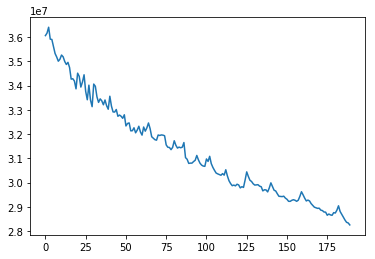

In [63]:
plt.plot(resultados_cv)

In [67]:
from sklearn.model_selection import cross_validate
scoring = {"mae": "neg_mean_absolute_error", "rmse": rmse_cross_val}
estimator = model_ols
scores = cross_validate(estimator, pelis_numerico,
                        pelis_numerico["ventas"], scoring=scoring,
                         cv=100, return_train_score=True)

In [68]:
pd.DataFrame(scores).mean()

fit_time     0.002569
score_time   0.000957
test_mae         -0.0
train_mae        -0.0
test_rmse         0.0
train_rmse        0.0
dtype: float64